# <center>**Improving Employee Retention by Predicting Employee Attrition Using Machine Learning 💼📊**</center>

---

## Project Description:
In this project, we aim to tackle the critical issue of employee attrition by leveraging the power of machine learning. Employee retention is not only crucial for the well-being of the workforce but also for the success and stability of any organization. We will go through the following steps to achieve this:



1. Data Preprocessing 📦:

  * Collect and clean employee data, ensuring data quality and consistency.
  * Handle missing values, outliers, and duplicates.
  * Transform categorical data into numerical formats.
  * Feature engineering to extract relevant information.

2. Annual Report on Employee Number Changes 📈:

  * Analyze historical data to create an annual report on employee count changes.
  * Identify patterns, trends, and seasonality in the data.
  * Visualize insights to provide a comprehensive view of employee dynamics.

3. Resign Reason Analysis 📋:

  * Explore the reasons behind employee resignations.
  * Conduct sentiment analysis on resignation letters or feedback forms.
  * Identify common themes and issues leading to attrition.

4. Automated Resign Behavior Prediction 🤖:

  * Train machine learning models on historical data to predict potential resignations.
  * Utilize predictive features such as job satisfaction, salary, tenure, and more.
  * Evaluate and fine-tune models to improve prediction accuracy.

5. Deployment and Presentation 🚀🎤:

  * Deploy the machine learning model within the organization to monitor employee attrition in real-time.
  * Create a dashboard or user interface for HR personnel to access predictions.
  * Prepare a comprehensive presentation of the project findings and insights to share with relevant stakeholders.


## Libraries and Tools:
For this project, you will need a variety of libraries and tools, including but not limited to:

* **Python**: The primary programming language for data analysis and machine learning.
* **NumPy and Pandas**: For data manipulation and analysis.
* **Scikit-Learn**: To build and evaluate machine learning models.
* **Matplotlib and Seaborn**: For data visualization.
Natural Language Processing (NLP) Libraries (e.g., NLTK or SpaCy) for text analysis in resignation letters.
* **Jupyter Notebooks**: For interactive data exploration and model development.
* **GitHub** or other version control systems for collaboration and code management.
Remember to keep track of your progress, document your work, and collaborate with HR and relevant departments to ensure your model aligns with the company's goals and policies.

This project has the potential to significantly impact employee retention and overall organizational success. 📈👥🚀 Good luck!







## **📚Import Library📚**

every library that we need its gonna be packed in this code block below.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

!pip install -U scikit-learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#setting the figure display for the Visualization
rcParams['figure.figsize'] = 20,10
rcParams['lines.linewidth'] = 2.5
# rcParams['xticks.rotation'] = 25
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

##**Data Preparation**

in this step we gonna go ahead import our data from google drive into this project and understanding what the data can offer for us into a model

###Acces the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning (1).xlsx'
sheet_name = 'hr_data'

Mounted at /content/drive


In [ ]:
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [ ]:
df.shape

(287, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

so appearently in this dataset there are 287 rows and 25 columns in the dataset. the columns itself is enough for us to exactly performing the model, but since there is still a slight problem like there is still missing values that we have to handle.

In [ ]:
# Loop through each column
for column_name in df.columns:
    unique_values = df[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}':\n == {unique_values_str} == \n")

Unique values in 'Username':
 == spiritedPorpoise3, jealousGelding2, pluckyMuesli3, stressedTruffle1, shyTermite7, emptyMacaw4, madZebra1, cynicalMandrill7, lyingMussel8, enviousMoth4, puzzledCake4, grizzledSnipe7, yearningBagels0, sheepishSheep9, madWildfowl7, enviousSalami4, pacifiedRaisins7, wrathfulMagpie6, hushedSeahorse7, guiltyMoth4, peacefulCoati5, dejectedPolenta7, needfulLeopard2, offendedIguana0, pluckyHoopoe3, needySyrup4, forsakenOwl1, pluckyApples4, guiltySnail8, grizzledFlamingo9, worriedSyrup7, somberBoars0, giddyMallard9, madFerret4, mereCaribou1, decimalAbalone6, blissfulMussel3, ardentLapwing0, peskyTeal7, blissfulHyena1, solidMacaw1, cautiousPolenta9, excludedPorpoise4, shamefulIguana0, shySyrup7, forsakenCow7, grumpyFish4, wingedPorpoise5, soreCaribou0, needfulCardinal0, giddyCheetah9, hushedOil9, crummyPudding5, selfishBasmati2, adoringCardinal9, importedApricots7, grizzledCod7, insecureShads2, wornoutChamois3, lazyToucan3, cockyTeal5, puzzledBagels7, debonairPlov

# **🧹Data preprocessing🧹**

so now that we already know and really understand how is the data being sturctured, now let's clean the dataset so that we can actually be able to make it through modelling step.

###Handling missing values

In [ ]:
# Menghitung jumlah missing values per kolom
missing_values_count = df.isnull().sum()

missing_values_count

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

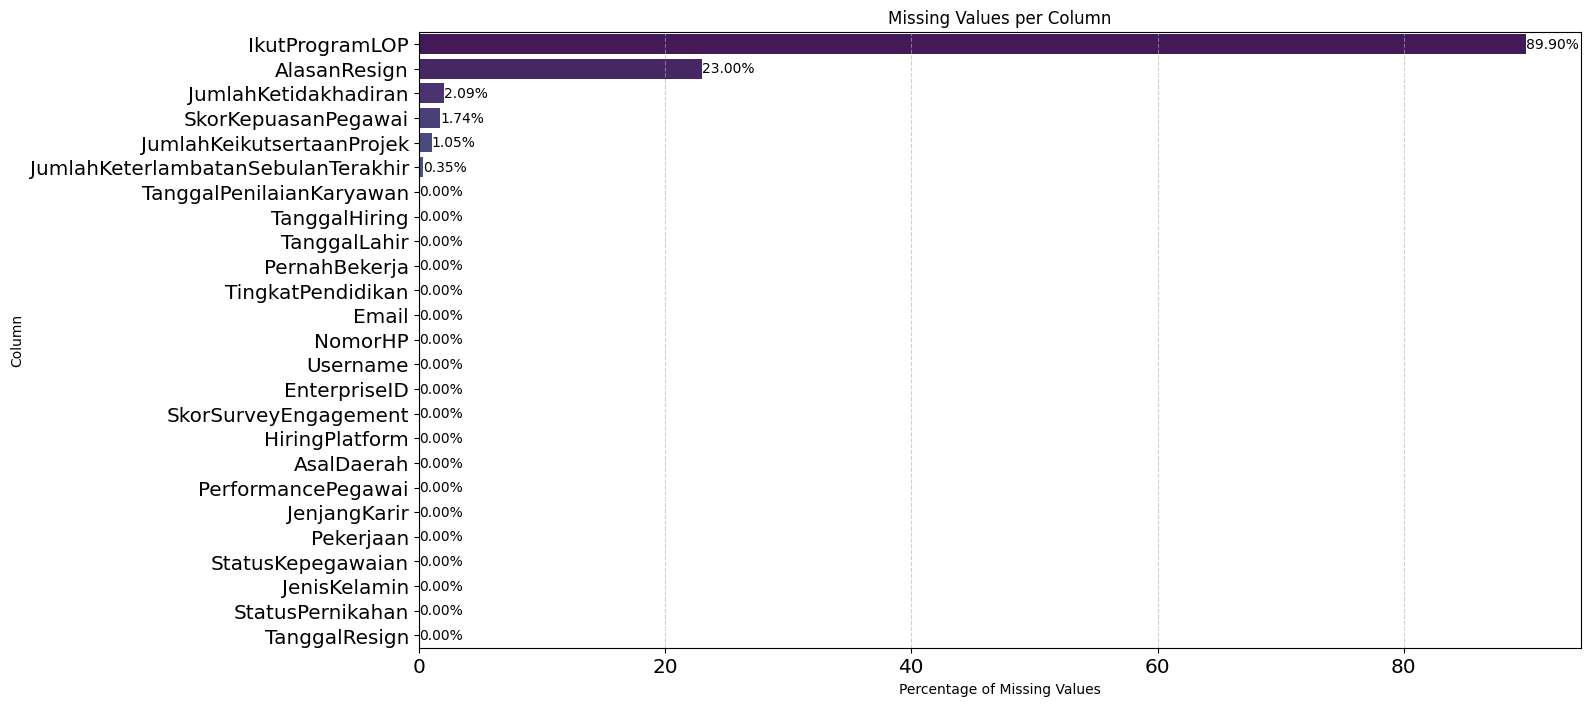

In [ ]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Sort columns by the percentage of missing values in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_values_percentage, y=missing_values_percentage.index, palette="viridis")

# Add percentage labels to the bars
for index, value in enumerate(missing_values_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Missing Values per Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

* **skorkepuasanpengawai**:

  * Step: Fill missing values with the mean value of the column.
  * Reason: Filling missing values with the mean value can provide a reasonable estimate without significantly impacting the data distribution.

* **jumlahkeikutsertaanprojek**:

  * Step: Fill missing values with the median value of the column.
  * Reason: Using the median value helps avoid the influence of outliers or extreme values when filling missing values.

* **Jumlahketerlambatansebulanterakhir:

  * Step: Fill missing values with the mean value of the column.
  * Reason: Using the mean value can provide a reasonable estimate without significantly affecting the data distribution.

* **Jumlahketidakhadiran**:

  * Step: Delete rows with missing values in this column.
  * Reason: The number of missing values in this column is substantial (6), so deleting rows with missing values can help maintain the integrity of the remaining data.

* **ikutprogramLOP**:

  * Step: Delete this column from the DataFrame.
  * Reason: This column has a very large number of missing values (258), and it does not significantly contribute to the analysis. Removing this column will not affect the essential information in the dataset.

* **AlasanResign**:

  * Step: Fill missing values with "Other," indicating that the reason for resignation is unknown or does not fall into predefined categories.
  * Reason: Filling missing values with "Other" helps retain the information that the reason for resignation is unknown, preserving the potential contribution of that data.

In [ ]:
#set the categorical columns
categorical_columns = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 'AlasanResign']
#set the numerical columns
numeric_columns = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

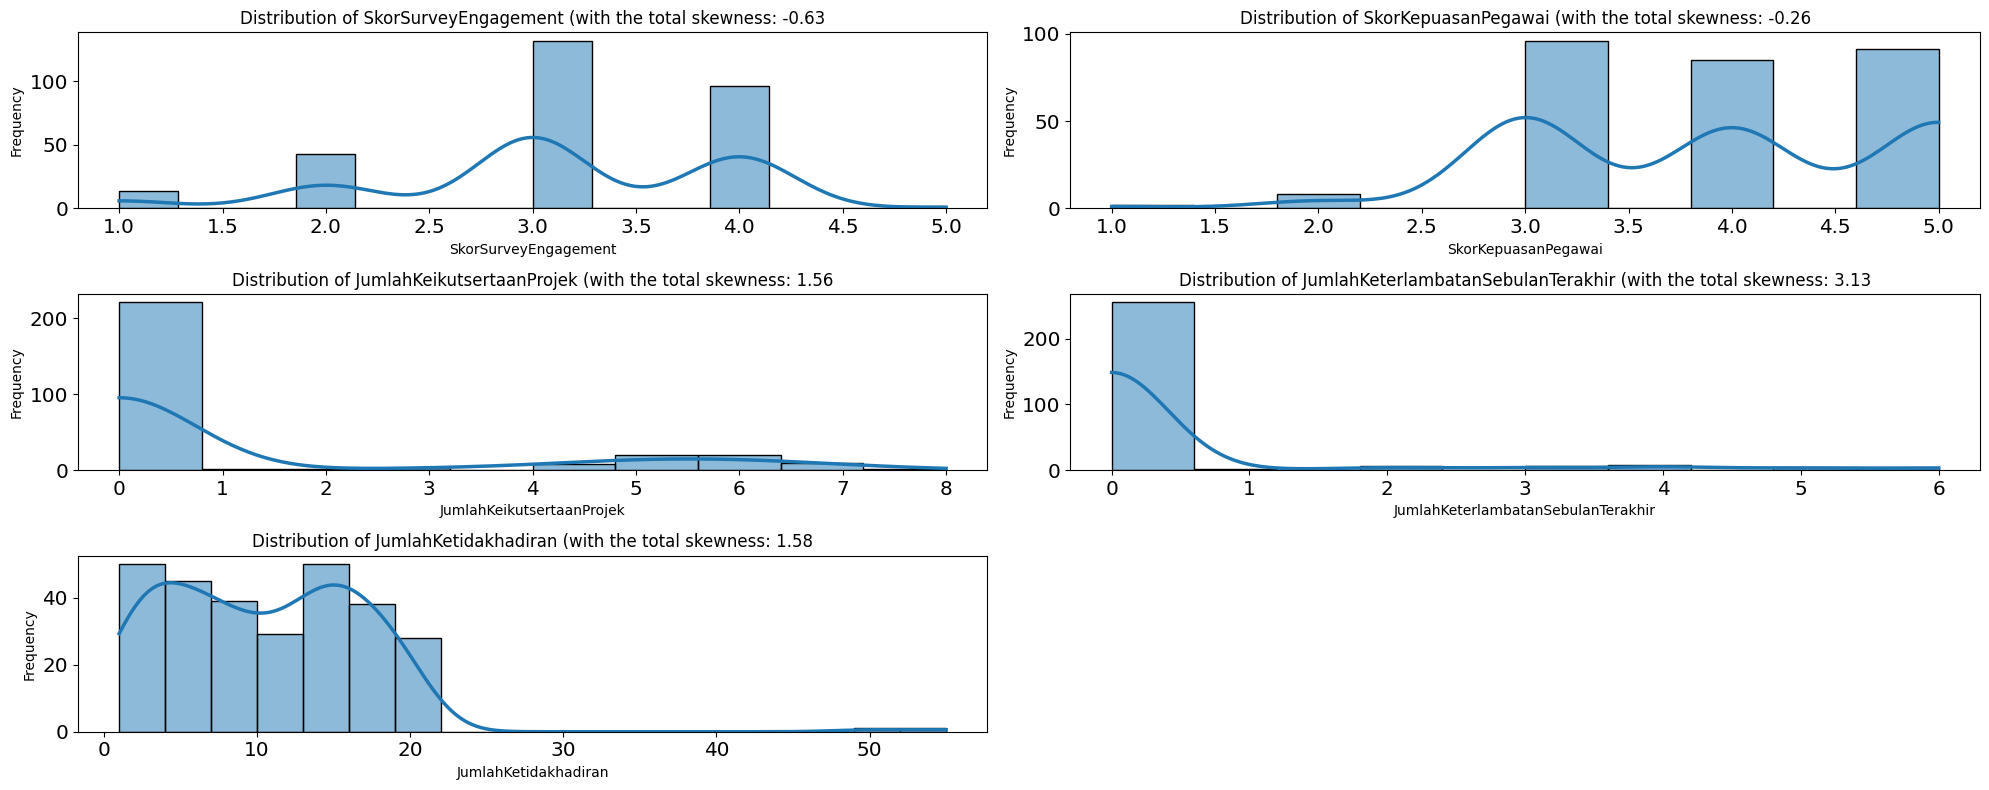

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 8))
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(numeric_columns):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde= True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name} (with the total skewness: {skewness:.2f}')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(numeric_columns), 6):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


since it's really small amount of data we might just fill the data with median because on how really skew the data.

In [ ]:
# List of columns to fill missing values with median
columns_to_fill_with_median = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'IkutProgramLOP']

# Fill missing values with median for the specified columns
df[columns_to_fill_with_median] = df[columns_to_fill_with_median].fillna(df.median())

### Checking Outlier

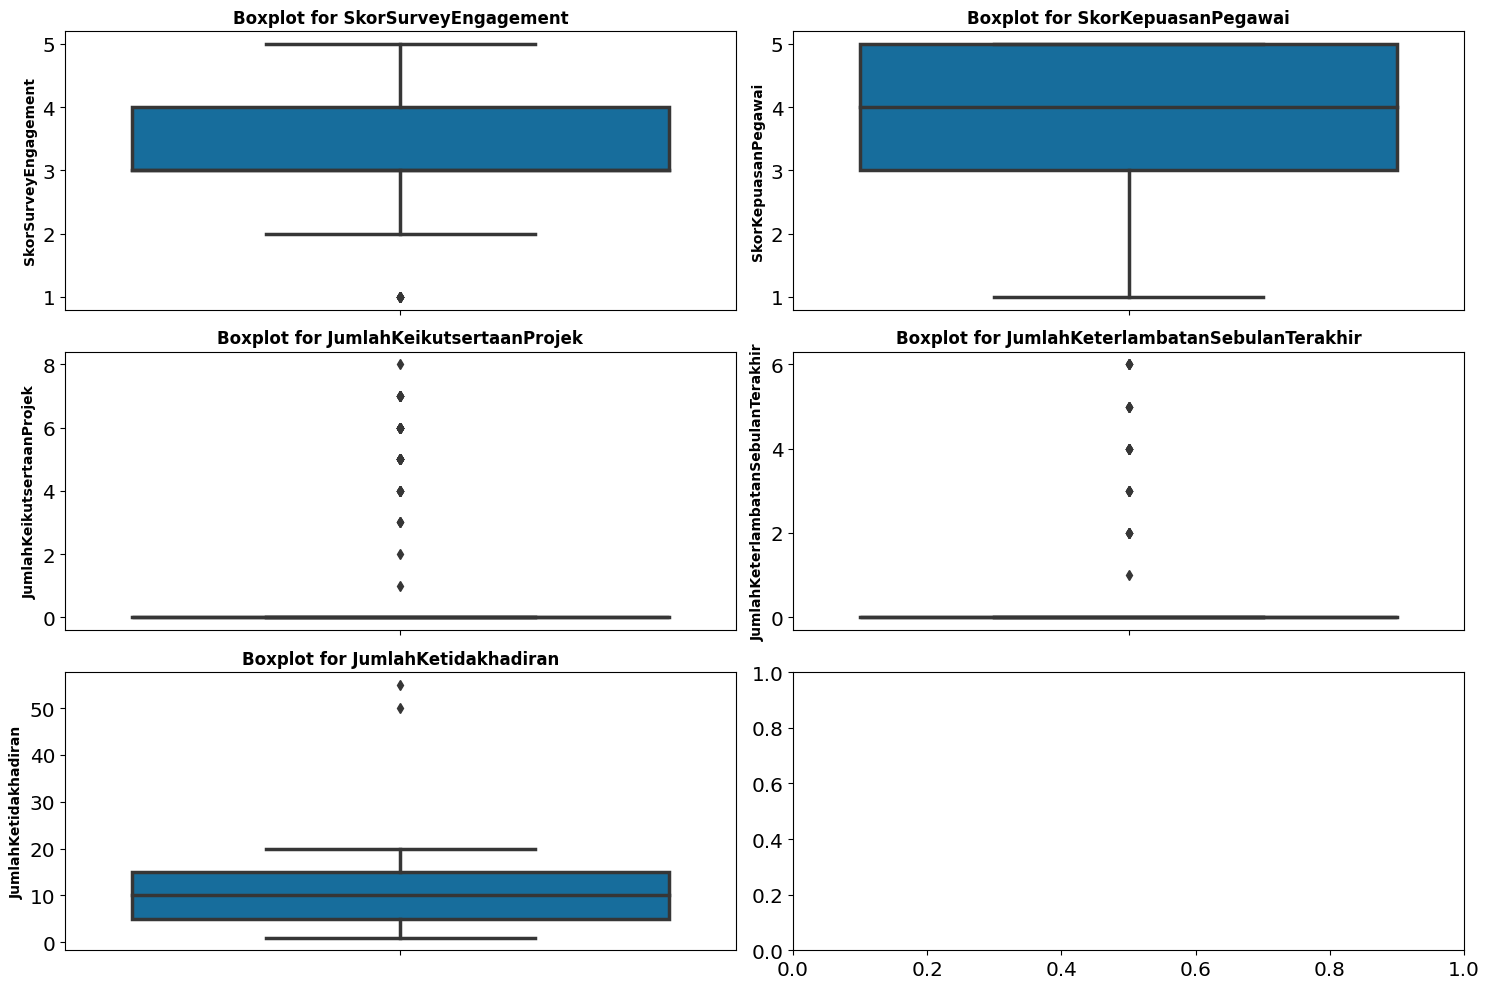

In [ ]:
# Set a colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(numeric_columns):
    # Create a vertical boxplot with the specified palette
    sns.boxplot(data=df, y=column_name, ax=axes[i], palette=palette)
    axes[i].set_title(f'Boxplot for {column_name}', fontweight='bold')
    axes[i].set_ylabel(column_name, fontweight='bold')
    axes[i].set_xlabel('')

# Hide any empty subplots
for i in range(len(numeric_columns), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Checking The Duplicate Data

In [ ]:
# Check for duplicate rows in the DataFrame
duplicates = df[df.duplicated()]

# If there are duplicates, print the duplicate rows
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found")

# Remove duplicates and keep the first occurrence
df.drop_duplicates(inplace=True)

No duplicate rows found


### Handling Incosistent data

in this step, we might gonna take a look a data who has weird unique values like maybe incorrect data or else, but first let's check the categoical data diagram.

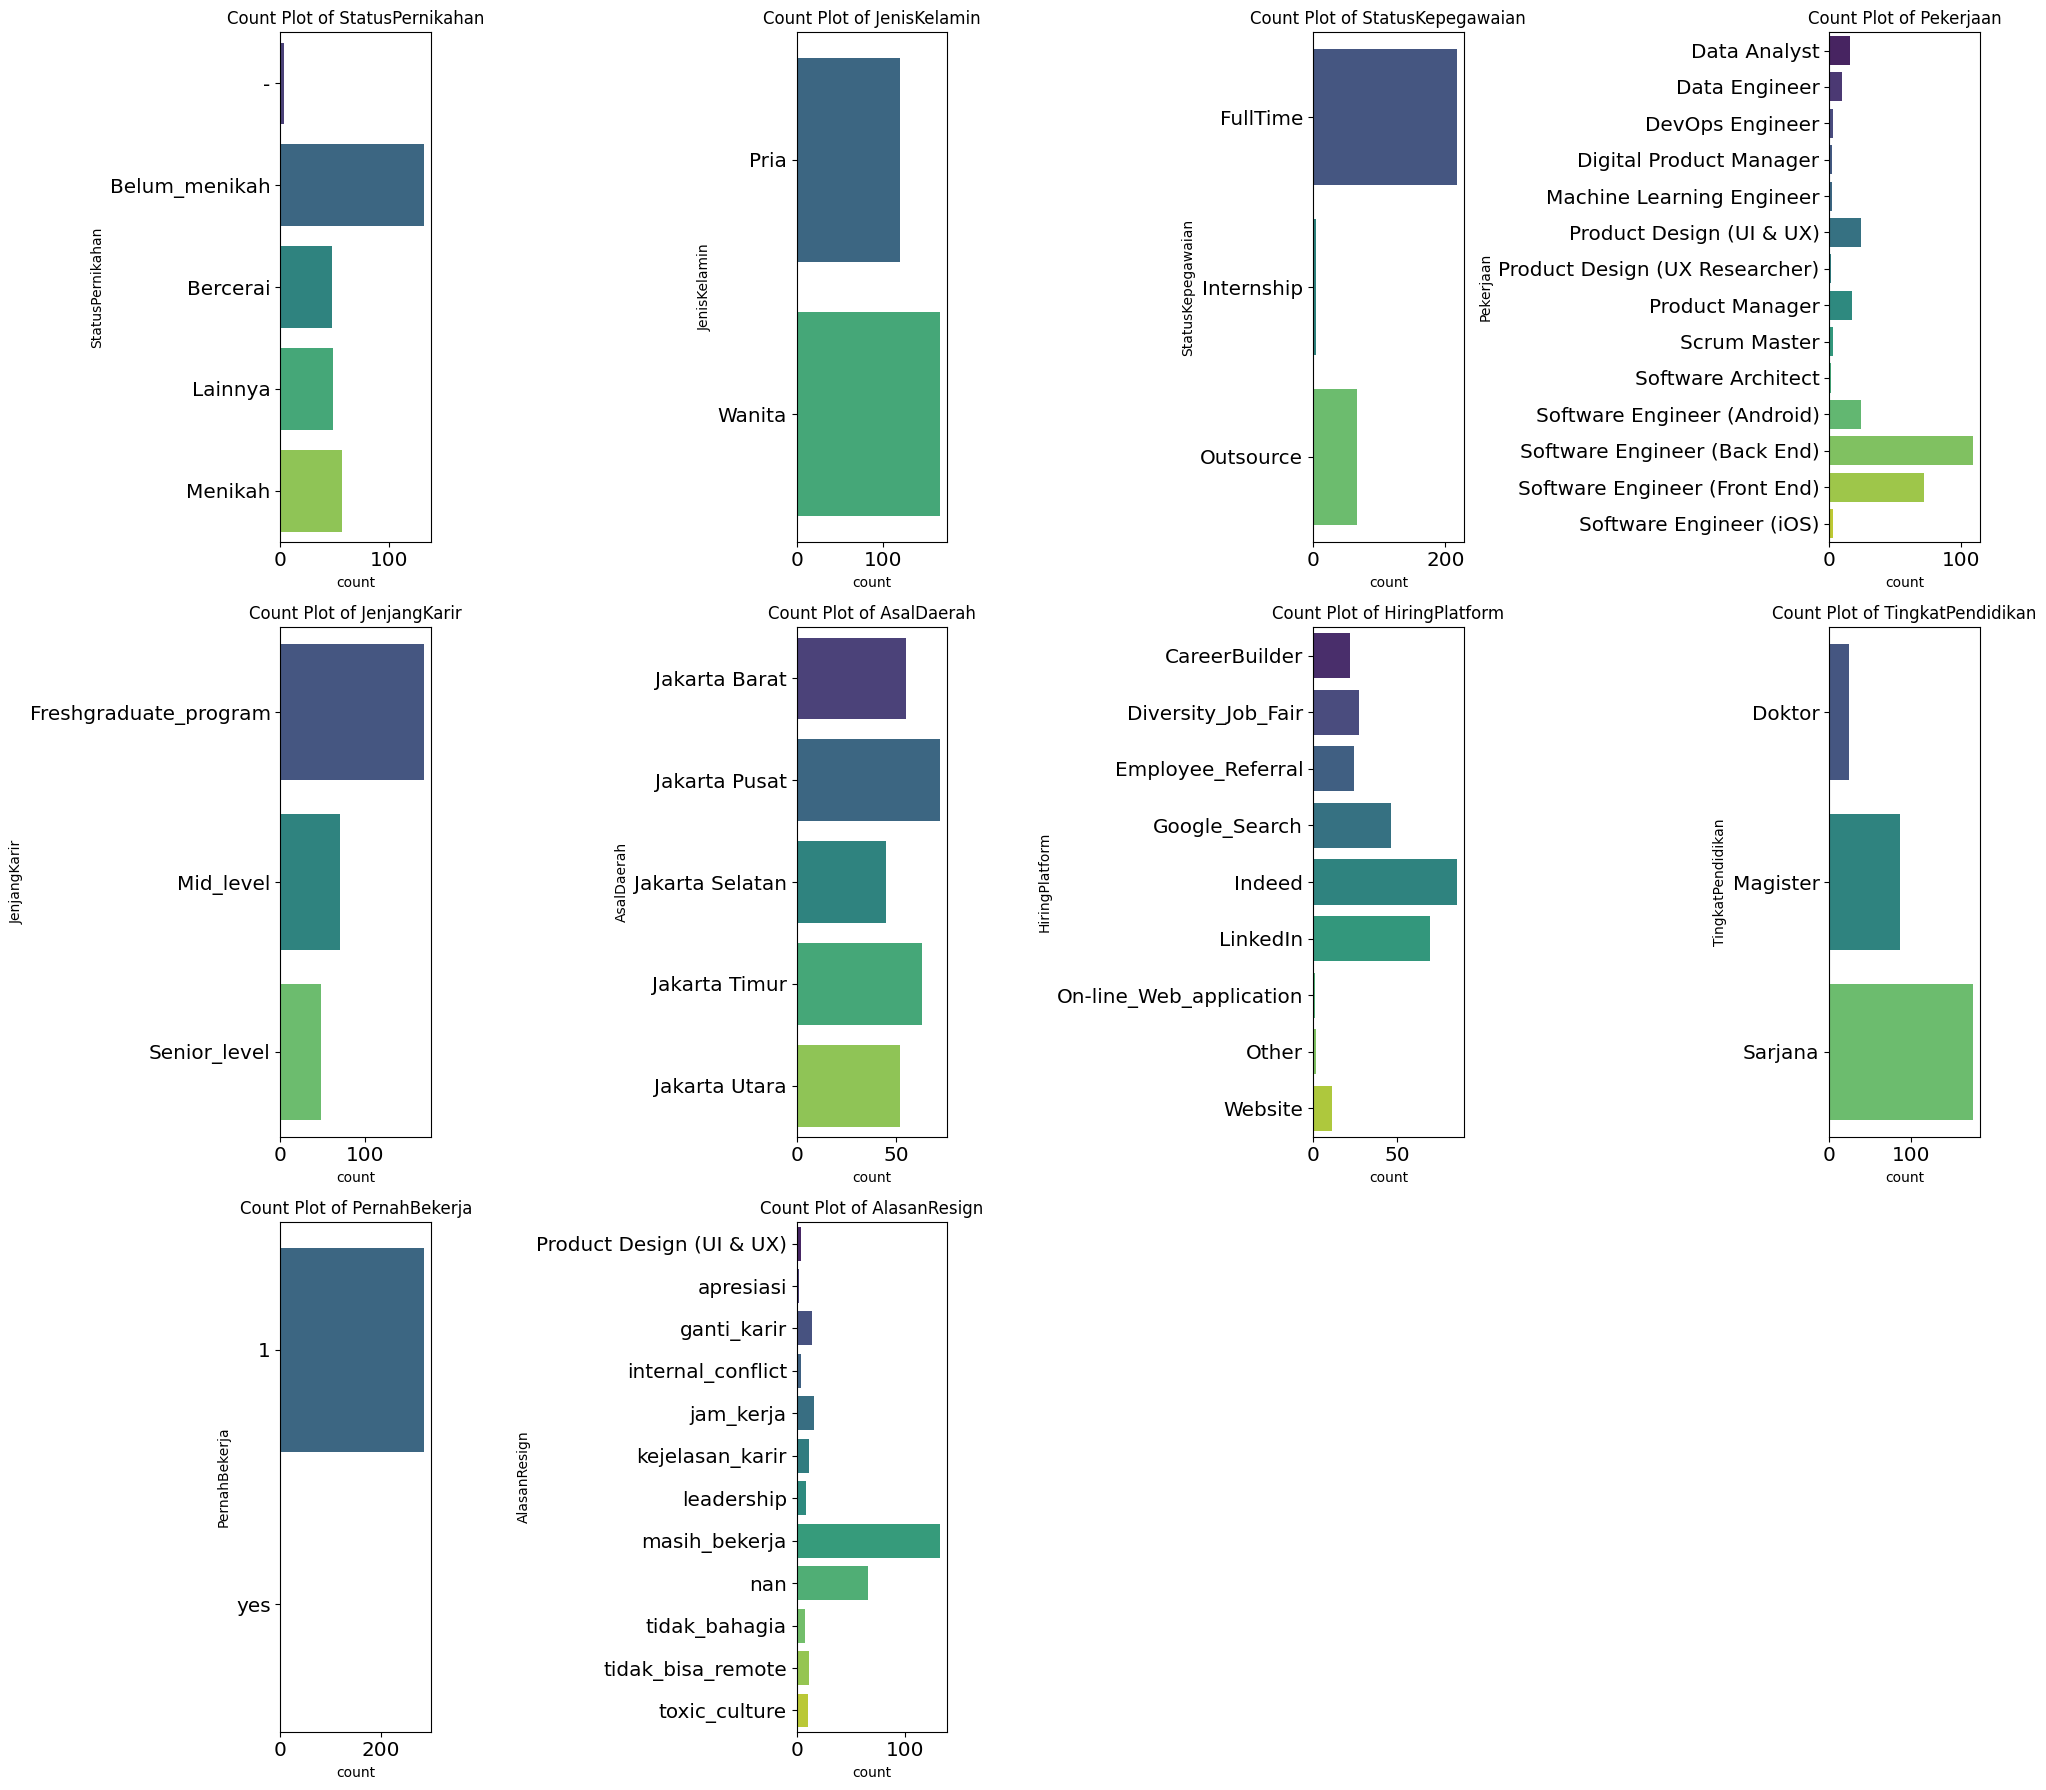

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 18))

# Create a 3x4 grid of subplots for count plots
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 4, i + 1)

    # Convert the column to a string type
    df[column] = df[column].astype(str)

    # Calculate the count of each category and sort them in ascending order
    category_counts = df[column].value_counts().sort_index(ascending=True)

    # Create the count plot
    sns.countplot(data=df, y=column, order=category_counts.index, palette='viridis')

    # Set labels and title
    plt.xlabel('count')
    plt.ylabel(column)
    plt.title(f'Count Plot of {column}')

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()

If you look at the diagram above, for various columns there is data that must be tidied up, such as:

* for marital status column:

i will move the merged '-' data values to 'other'

* Column Ever worked:

the step is I will combine everything from the value 1 I combine to 'yes'

* column for reason of resignation:

step by step I will combine product design (UI & UX) into 'other'


then also create a new column for how many are still working and not

In [ ]:
# Handling inconsistent data 'StatusPernikahan'
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Bercerai', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Lainnya', 'Belum_menikah')
df['StatusPernikahan'] = df['StatusPernikahan'].replace('Belum_menikah', 'Tidak_menikah')

# Handling inconsistent data 'PernahBekerja'
df['PernahBekerja'] = df['PernahBekerja'].replace('1', 'yes')

# Mengatasi inconsistent data pada kolom 'AlasanResign'
df['AlasanResign'] = df['AlasanResign'].replace('Product Design (UI & UX)', 'Dll')
df['AlasanResign'] = df['AlasanResign'].replace('nan', 'Dll')

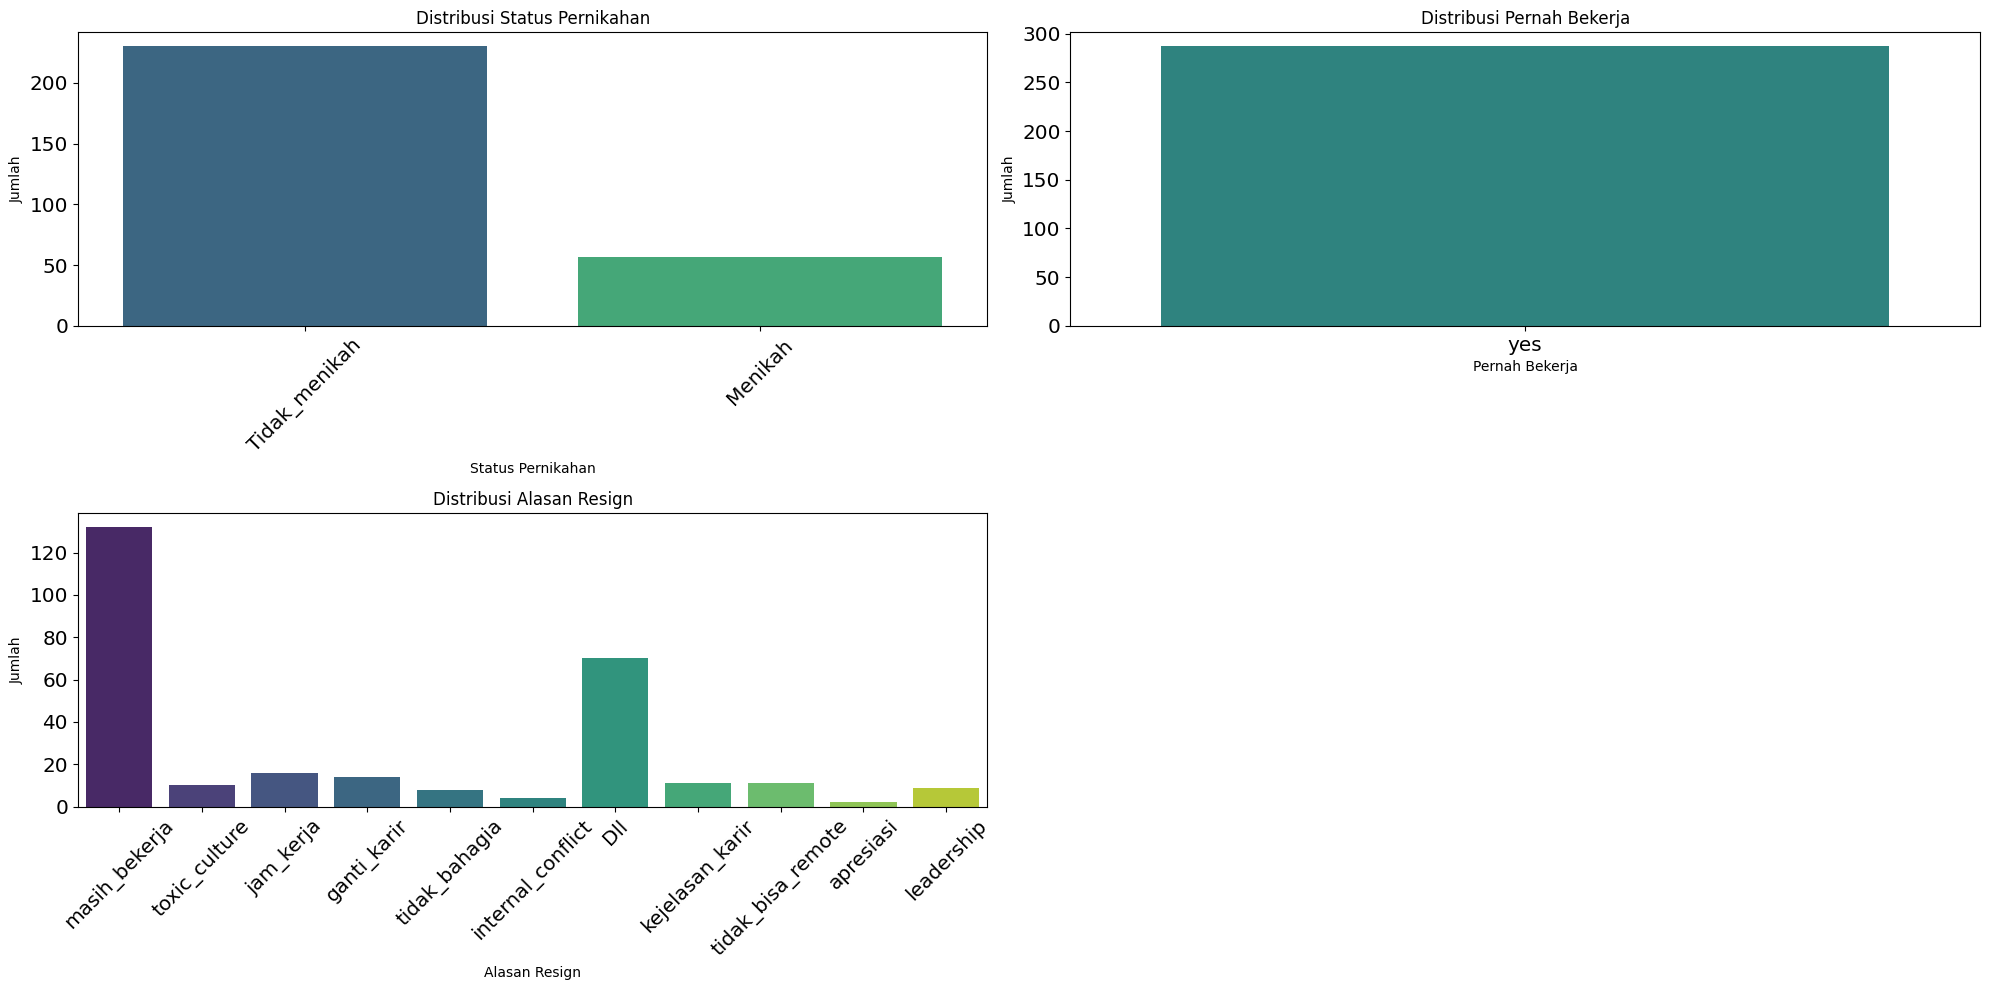

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Visualisasi kolom 'StatusPernikahan' setelah preprocessing
sns.countplot(data=df, x='StatusPernikahan', palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Distribusi Status Pernikahan')
ax[0, 0].set_xlabel('Status Pernikahan')
ax[0, 0].set_ylabel('Jumlah')
ax[0, 0].tick_params(axis='x', rotation=45)

# Visualisasi kolom 'PernahBekerja' setelah preprocessing
sns.countplot(data=df, x='PernahBekerja', palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Distribusi Pernah Bekerja')
ax[0, 1].set_xlabel('Pernah Bekerja')
ax[0, 1].set_ylabel('Jumlah')

# Visualisasi kolom 'AlasanResign' setelah preprocessing
sns.countplot(data=df, x='AlasanResign', palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Distribusi Alasan Resign')
ax[1, 0].set_xlabel('Alasan Resign')
ax[1, 0].set_ylabel('Jumlah')
ax[1, 0].tick_params(axis='x', rotation=45)

# Hide the last subplot (ax[1, 1]) since it's not used
ax[1, 1].axis('off')

# Set the display
plt.tight_layout()
plt.show()

## **🔨Feature Engineering🔨**

##work Status Column

In [ ]:
# Membuat kolom baru "StatusKerja"
df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 'Masih Bekerja' if x == '-' or pd.isnull(x) else 'Tidak Bekerja')

In [ ]:
df['StatusKerja'].head()

0    Masih Bekerja
1    Tidak Bekerja
2    Tidak Bekerja
3    Masih Bekerja
4    Tidak Bekerja
Name: StatusKerja, dtype: object

##Hiring column

In [ ]:
# Mengonversi kolom "TanggalHiring" menjadi tipe data datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])

# Mengonversi kolom "TanggalResign" menjadi tipe data datetime
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

# Mengekstrak tahun hiring dan tahun resign
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['BulanHiring'] = df['TanggalHiring'].dt.month
df['HariHiring'] = df['TanggalHiring'].dt.day

df['TahunResign'] = df['TanggalResign'].dt.year

###Age Employee Category column

In [ ]:
from datetime import datetime

df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
current_year = datetime.now().year
df['UsiaKaryawan'] = current_year - df['TanggalLahir'].dt.year

bins = [0, 30, 40, float('inf')]
labels = ['Muda', 'Menengah', 'Tua']
df['KategoriUsia'] = pd.cut(df['UsiaKaryawan'], bins=bins, labels=labels)

##served Duration Column

In [ ]:
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['LamaMenjabat'] = ((df['TanggalPenilaianKaryawan'] - df['TanggalHiring']).dt.days // 30).fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

#**📈Annual Report Analysis📈**

this is the step where we have to craete a daily report to our management to see if we can find any insight about our employee workflow and discuss it with HR or our personalia management

### Trend Plot for Incoming and Outgoing Employees

In [ ]:
# 1. Create two aggregate tables for incoming and outgoing employees
incoming_employees = df['TahunHiring'].value_counts().reset_index()
incoming_employees.columns = ['Year', 'Incoming Employees']

outgoing_employees = df['TahunResign'].value_counts().reset_index()
outgoing_employees.columns = ['Year', 'Outgoing Employees']

# 2. Join the two tables based on the year of resignation and hiring using an outer join
annual_report = incoming_employees.merge(outgoing_employees, on='Year', how='outer')

# 3. Perform imputation on the empty year data
annual_report['Year'] = annual_report['Year'].fillna(0)
annual_report['Year'] = annual_report['Year'].astype(int)

# 4. Calculate the total number of employees who resigned, those who still remain, and the changes in each year
annual_report['Total Resigned'] = annual_report['Outgoing Employees'].cumsum()
annual_report['Total Remaining'] = annual_report['Incoming Employees'].cumsum() - annual_report['Total Resigned']
annual_report['Changes'] = annual_report['Total Remaining'] - annual_report['Total Resigned']

In [ ]:
annual_report = annual_report.sort_values(by='Year')

annual_report

,Year,Incoming Employees,Outgoing Employees,Total Resigned,Total Remaining,Changes
12,2006,1.0,NaN,NaN,NaN,NaN
10,2007,2.0,NaN,NaN,NaN,NaN
9,2008,2.0,NaN,NaN,NaN,NaN
7,2009,7.0,NaN,NaN,NaN,NaN
6,2010,8.0,NaN,NaN,NaN,NaN
0,2011,76.0,NaN,NaN,NaN,NaN
3,2012,41.0,NaN,NaN,NaN,NaN
2,2013,43.0,5.0,17.0,158.0,141.0
1,2014,56.0,12.0,12.0,120.0,108.0
4,2015,31.0,8.0,25.0,222.0,197.0


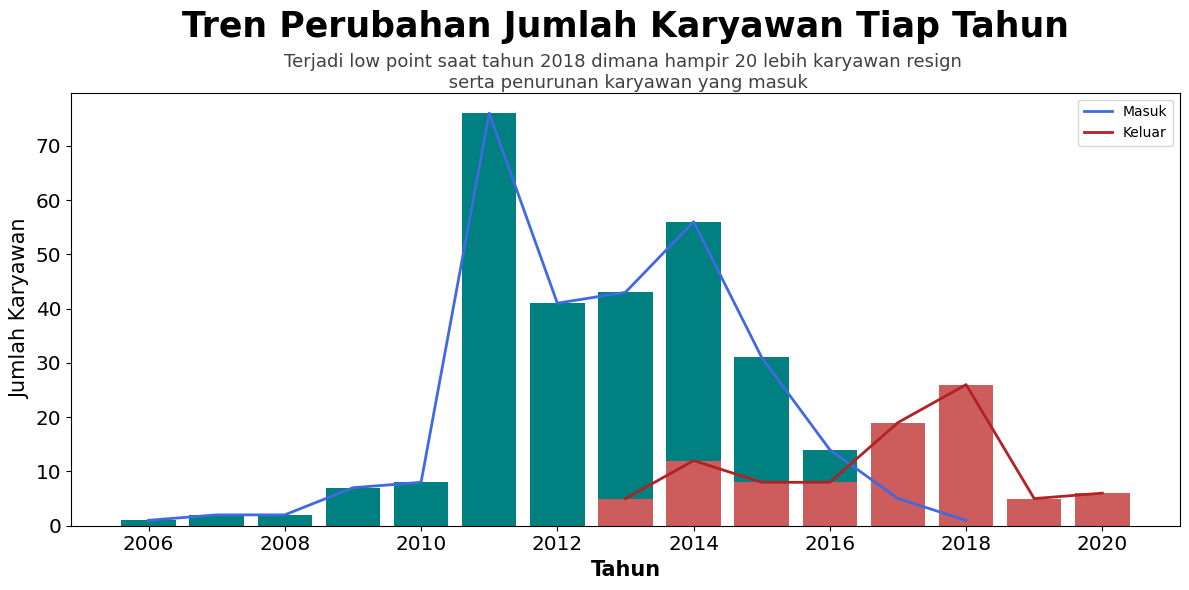

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Line and bar plot for incoming employees
sns.lineplot(data=annual_report, x='Year', y='Incoming Employees', label='Masuk', lw=2, ax=ax, color= 'royalblue')
ax.bar(annual_report['Year'], annual_report['Incoming Employees'], color='teal')
# Line and Bar chart for outgoing employees
sns.lineplot(data=annual_report, x='Year', y='Outgoing Employees',color='firebrick', label='Keluar', lw=2, ax=ax)
ax.bar(annual_report['Year'], annual_report['Outgoing Employees'], color='indianred')

# Set the title for the plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'Terjadi low point saat tahun 2018 dimana hampir 20 lebih karyawan resign \n serta penurunan karyawan yang masuk'
plt.text((x_start+x_end)/2, y_end*1.01, desc, ha='center', fontsize=13, alpha=0.75)

# Set labels and title
ax.set_xlabel('Tahun', fontsize=15, fontweight='bold')
ax.set_ylabel('Jumlah Karyawan', fontsize=15)
ax.set_title('Tren Perubahan Jumlah Karyawan Tiap Tahun', fontsize=25, fontweight='bold', pad=40)

# Add legends for both line and bar chart
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Waterfall(
        x=annual_report['Year'],
        y=annual_report['Changes'],
        text=annual_report['Changes'].apply(lambda x: f'{x:,.0f}'),
        measure=['relative'] * len(annual_report),
        base=0
    )
])

fig.update_layout(
    title="Perubahan Jumlah Karyawan per Tahun",
    xaxis_title="Tahun",
    yaxis_title="Perubahan",
    font=dict(
        size=25,
        color='black'
    ),
    width=1300,
    height=900
)

fig.show()

Based on data on the number of employees entering and leaving each year, several insights can be drawn regarding the conditions of the employee workforce. The following are insights that can be obtained:

* The number of incoming employees experienced a significant increase from 2006 to 2011. However, after 2011, the growth trend in the number of incoming employees tends to decline slowly.

* The number of employees leaving has also increased from year to year. The trend of increasing the number of employees leaving can be of concern because it can indicate factors that influence employees' decisions to resign.

* Changes in the number of employees (the difference between the number of incoming and the number of outgoing) fluctuate from year to year. There are years where the change in the number of employees is negative, indicating an overall decrease in the number of employees.

Based on the insight above, the condition of the employee workforce may be worrying due to the downward trend in the growth of the number of employees entering and the increase in the number of employees leaving.

###percantage of employees that still work

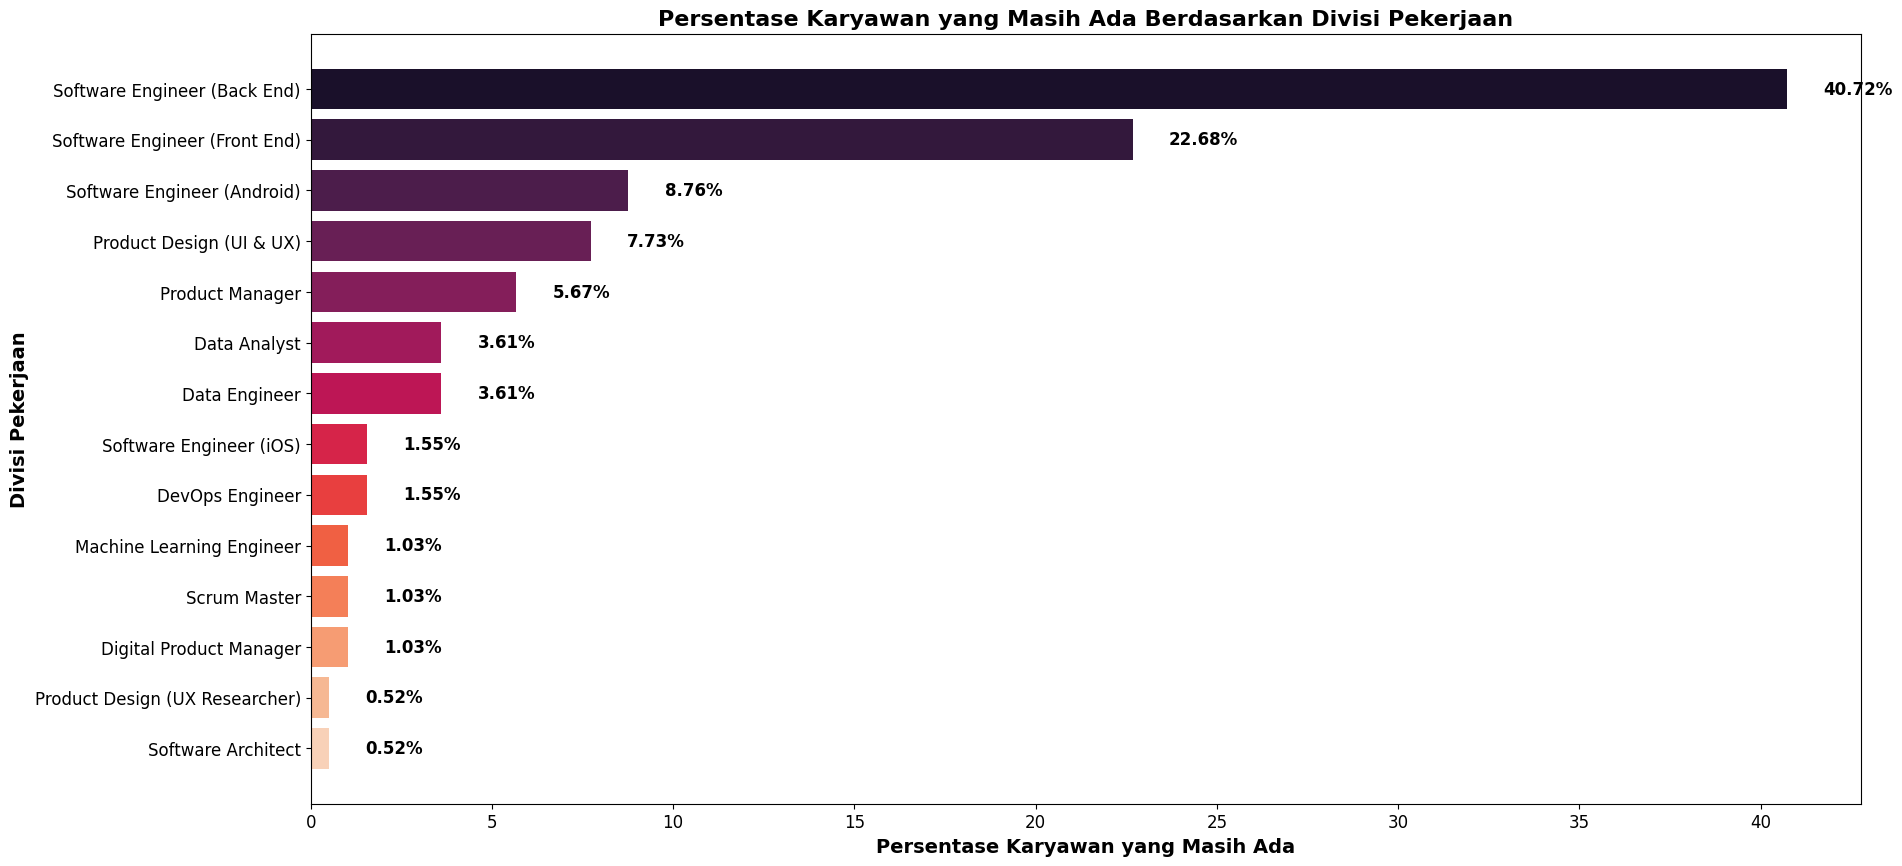

In [ ]:
divisions = [
    'Product Design (UX Researcher)',
    'Software Architect',
    'Machine Learning Engineer',
    'Scrum Master',
    'Digital Product Manager',
    'Software Engineer (iOS)',
    'DevOps Engineer',
    'Data Analyst',
    'Data Engineer',
    'Product Manager',
    'Product Design (UI & UX)',
    'Software Engineer (Android)',
    'Software Engineer (Front End)',
    'Software Engineer (Back End)'
]

counts = [
    1, 1, 2, 2, 2, 3, 3, 7, 7, 11, 15, 17, 44, 79
]

total_karyawan = sum(counts)
percentages = [(count / total_karyawan) * 100 for count in counts]

# Sort divisions and percentages in ascending order by values
sorted_data = sorted(zip(divisions, percentages), key=lambda x: x[1], reverse=True)

divisions, percentages = zip(*sorted_data)

# Customize the color palette
colors = sns.color_palette('rocket', len(divisions))

# Create the horizontal bar chart
plt.barh(divisions, percentages, color=colors)
plt.xlabel('Persentase Karyawan yang Masih Ada', fontsize=14, fontweight='bold')
plt.ylabel('Divisi Pekerjaan', fontsize=14, fontweight='bold')
plt.title('Persentase Karyawan yang Masih Ada Berdasarkan Divisi Pekerjaan', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Reverse the order of divisions

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.show()

### Incoming and Outgoing Employees Based on Career

In [ ]:
# Retrieve data on employees who have resigned
df_resigned = df[df['StatusKerja'] == 'Tidak Bekerja']

# Create an aggregation table to calculate the number of employees who resigned based on career level, employee performance and reasons for resigning
tabel_agregasi = df_resigned.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='JumlahKaryawanResign')

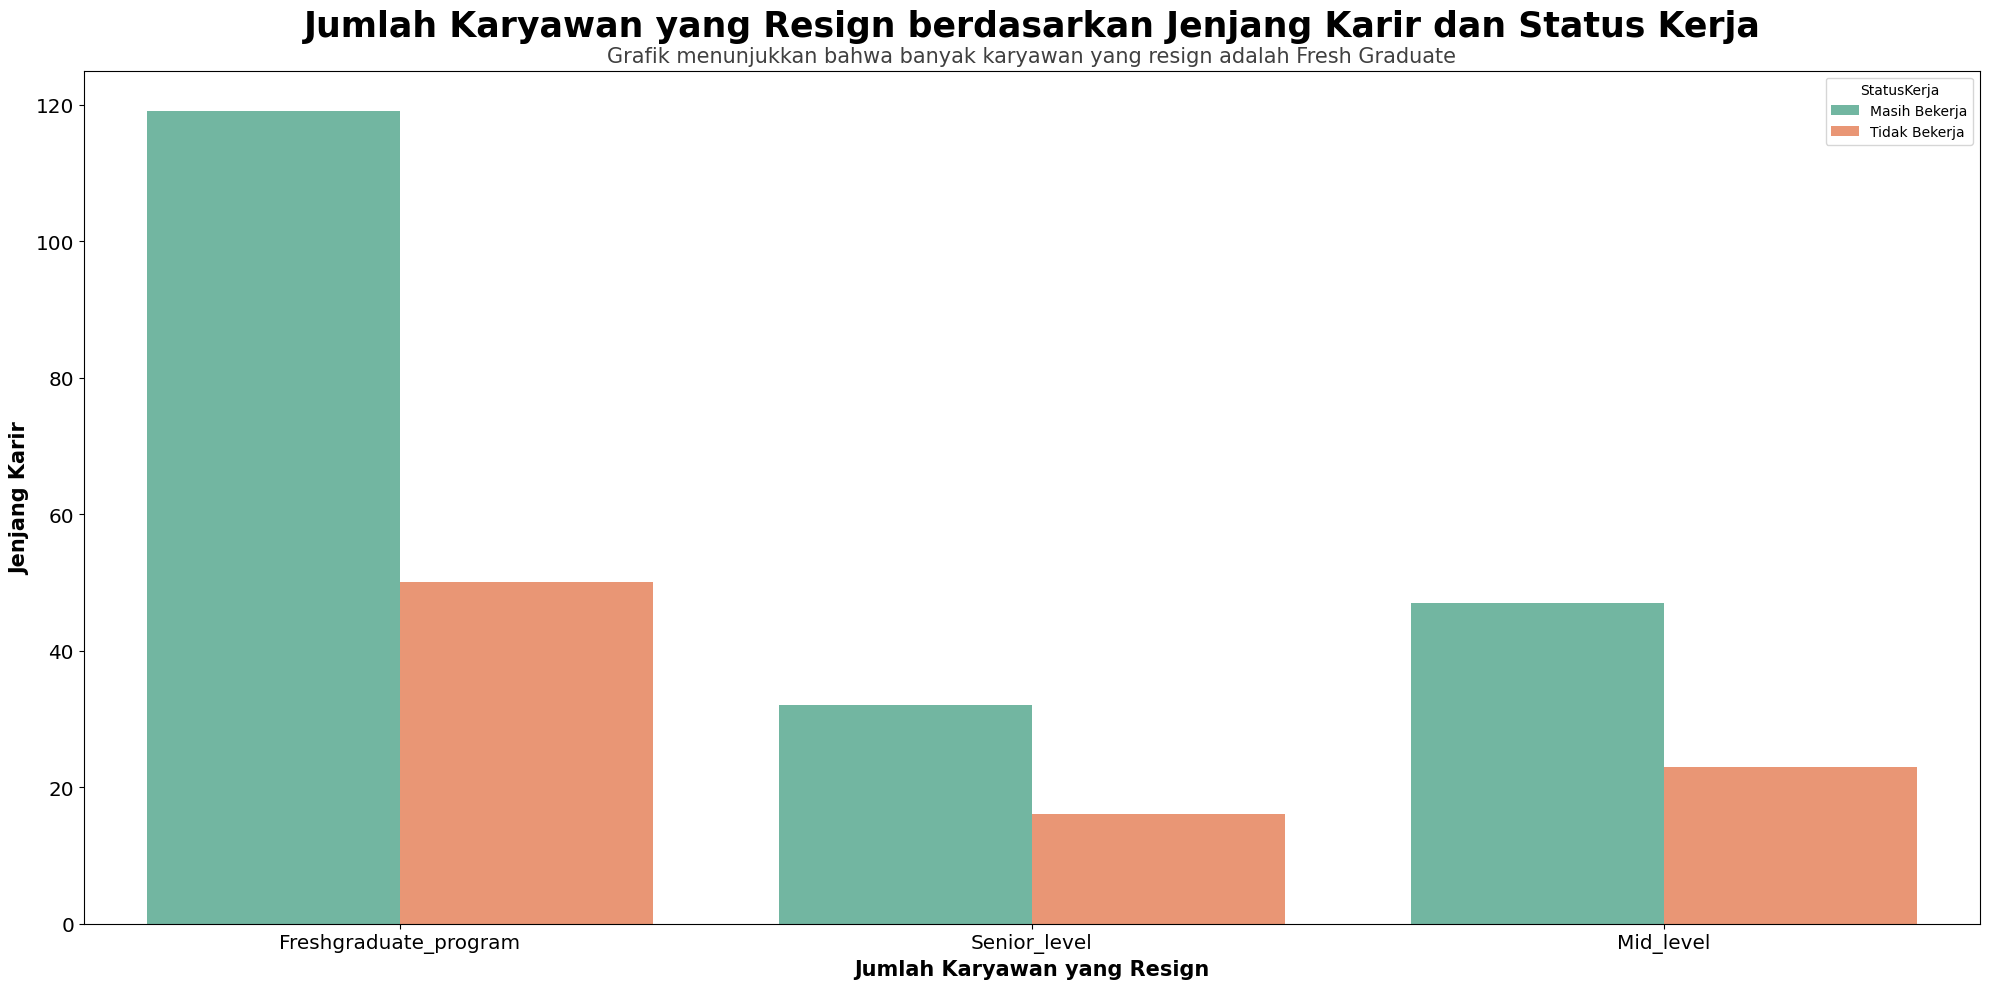

In [ ]:
# Create a bar plot with "JenjangKarir" on the y-axis and "StatusKerja" as hue
sns.countplot(data=df, x='JenjangKarir', hue='StatusKerja', palette='Set2')

# Set the title and labels
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'Grafik menunjukkan bahwa banyak karyawan yang resign adalah Fresh Graduate'
plt.text((x_start + x_end) / 2, y_end * 1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Jumlah Karyawan yang Resign', fontsize=15, fontweight='bold')
plt.ylabel('Jenjang Karir', fontsize=15, fontweight='bold')
plt.title('Jumlah Karyawan yang Resign berdasarkan Jenjang Karir dan Status Kerja', fontsize=25, fontweight='bold', pad=25)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Outoging Employees based on Performancec

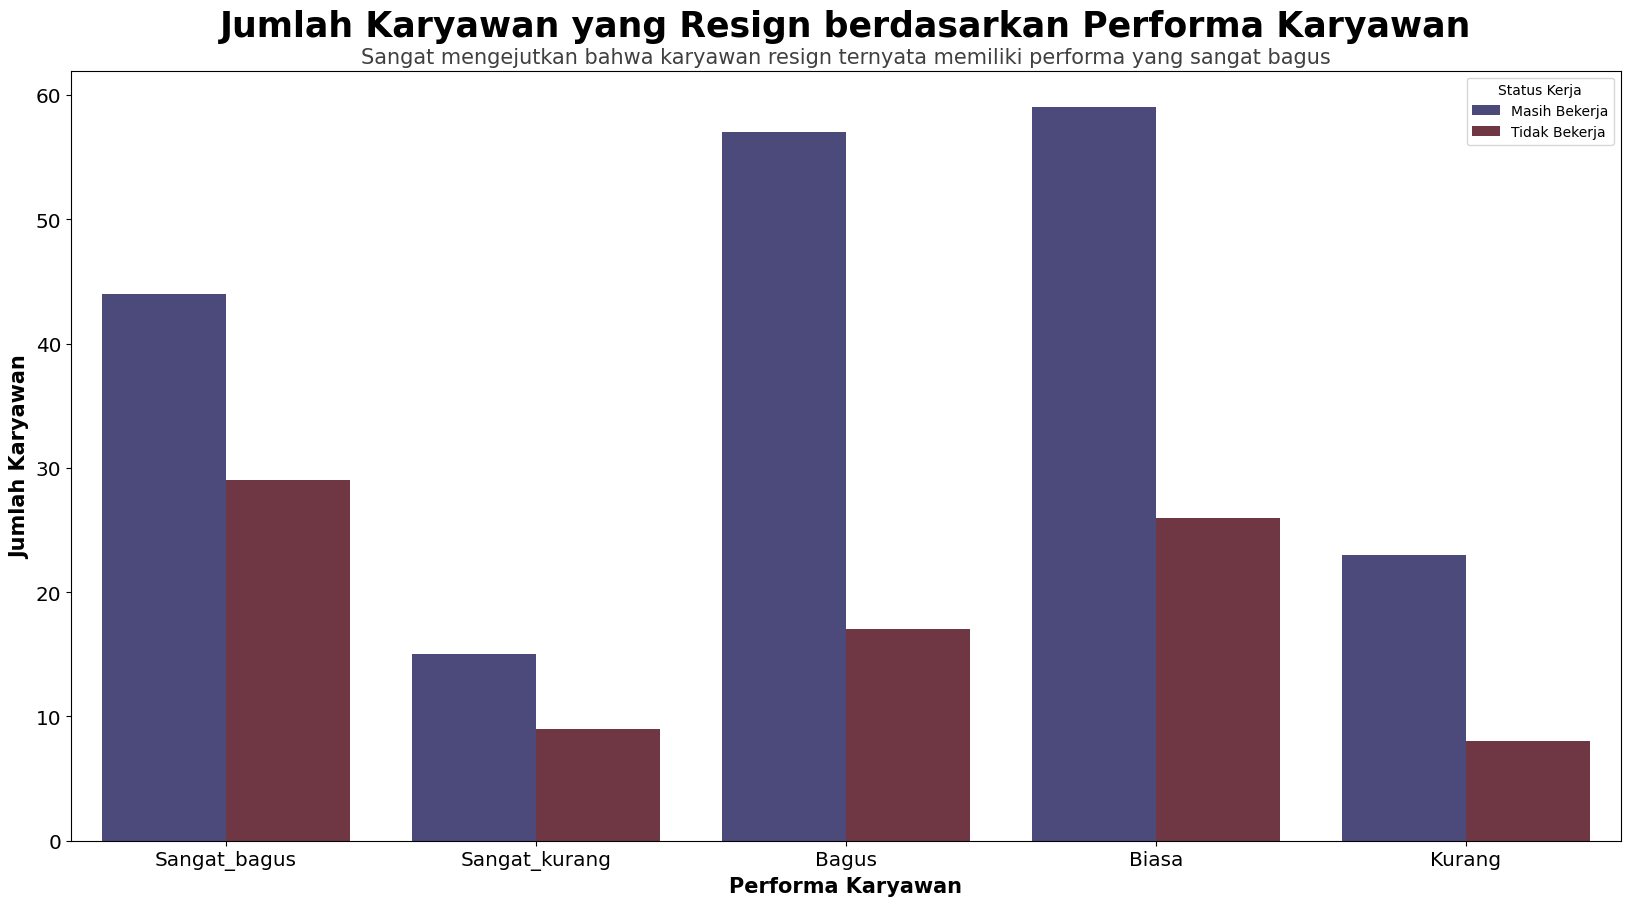

In [ ]:
# Create the bar chart with hue based on "StatusKerja"
sns.countplot(data=df, x='PerformancePegawai', hue='StatusKerja', palette='icefire')

# Set the title for the plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'Sangat mengejutkan bahwa karyawan resign ternyata memiliki performa yang sangat bagus'
plt.text((x_start + x_end) / 2, y_end * 1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Performa Karyawan', fontsize=15, fontweight='bold')
plt.ylabel('Jumlah Karyawan', fontsize=15, fontweight='bold')
plt.title('Jumlah Karyawan yang Resign berdasarkan Performa Karyawan', fontsize=25, fontweight='bold', pad=25)

plt.xticks(rotation=0)
plt.legend(title='Status Kerja')
plt.show()

###Resign Reason Analysis for Employee Attrition Management Strategy

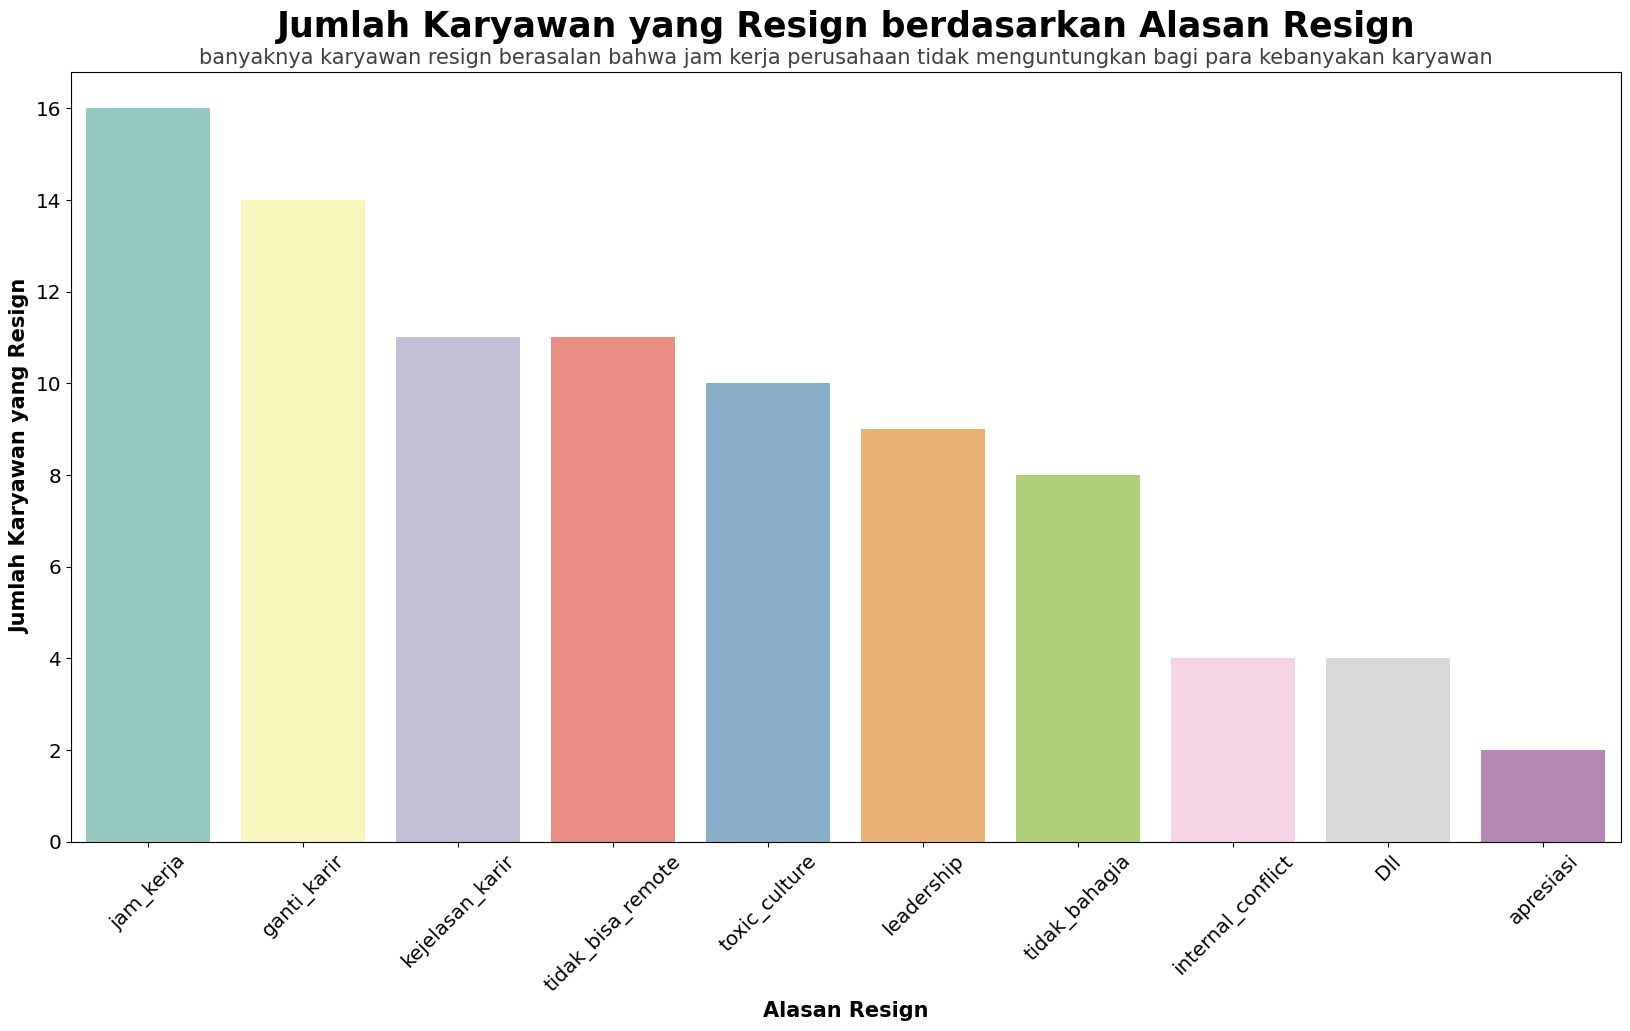

In [ ]:
# Menghitung jumlah karyawan yang resign berdasarkan Alasan Resign
alasan_resign_counts = df_resigned['AlasanResign'].value_counts()

# Mengurutkan kategori Alasan Resign berdasarkan jumlah karyawan yang resign dari yang terbesar
alasan_resign_sorted = alasan_resign_counts.sort_values(ascending=False)
sns.countplot(x='AlasanResign', data=df_resigned, order=alasan_resign_sorted.index, palette='Set3')

#setting the title plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'banyaknya karyawan resign berasalan bahwa jam kerja perusahaan tidak menguntungkan bagi para kebanyakan karyawan'
plt.text((x_start+x_end)/2, y_end*1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Alasan Resign', fontsize = 15, fontweight = 'bold')
plt.ylabel('Jumlah Karyawan yang Resign', fontsize = 15, fontweight = 'bold')
plt.title('Jumlah Karyawan yang Resign berdasarkan Alasan Resign', fontsize = 25, fontweight = 'bold', pad = 25)
plt.xticks(rotation=45)
plt.show()

#**Build an Automated Resignation Behavior Prediction using Machine Learning**



In [ ]:
# Deteksi missing value pada baris dan kolom
missing_rows = df.isnull().sum(axis=1)
missing_columns = df.isnull().sum(axis=0)

print('Total baris kosong:', missing_rows)

Total baris kosong: 0      2
1      0
2      0
3      2
4      0
      ..
282    2
283    0
284    0
285    0
286    2
Length: 287, dtype: int64


In [ ]:
print("Total kolom kosong:", missing_columns)

Total kolom kosong: Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                          0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilai

In [ ]:
# Deteksi data duplikat
duplicate_rows = df.duplicated()

print("total kemunculan duplikasi data:", duplicate_rows)

total kemunculan duplikasi data: 0      False
1      False
2      False
3      False
4      False
       ...  
282    False
283    False
284    False
285    False
286    False
Length: 287, dtype: bool


In [ ]:
# Copy dataframe untuk encoding
df_encoded = df.copy()

In [ ]:
# Kolom untuk one-hot encoding
one_hot_columns = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'KategoriUsia']

# Kolom untuk label encoding
label_encode_columns = ['Pekerjaan', 'PernahBekerja', 'AlasanResign', 'StatusKerja', 'PerformancePegawai', 'StatusKerja']

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns)

# Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in label_encode_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [ ]:
# removing unecesssary columns
columns_to_drop = ['Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'TahunResign']
df_encoded.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Pekerjaan                               287 non-null    int64  
 1   PerformancePegawai                      287 non-null    int64  
 2   SkorSurveyEngagement                    287 non-null    int64  
 3   SkorKepuasanPegawai                     287 non-null    float64
 4   JumlahKeikutsertaanProjek               287 non-null    float64
 5   JumlahKeterlambatanSebulanTerakhir      287 non-null    float64
 6   JumlahKetidakhadiran                    287 non-null    float64
 7   PernahBekerja                           287 non-null    int64  
 8   IkutProgramLOP                          287 non-null    float64
 9   AlasanResign                            287 non-null    int64  
 10  StatusKerja                             287 non-null    int64 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek scaler
scaler = MinMaxScaler()

# Melakukan normalisasi Min-Max pada fitur-fitur numerik
numeric_features = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [ ]:
# Create an instance of SelectKBest with k=40 and chi-squared scoring function
k = 15
selector = SelectKBest(score_func=chi2, k=k)

X = df_encoded.drop(['StatusKerja'], axis=1)
y = df_encoded['StatusKerja']

# Fit the selector to your data and transform your features
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['PerformancePegawai', 'AlasanResign', 'HariHiring', 'UsiaKaryawan',
       'LamaMenjabat', 'StatusKepegawaian_Internship',
       'AsalDaerah_Jakarta Barat', 'AsalDaerah_Jakarta Timur',
       'HiringPlatform_CareerBuilder', 'HiringPlatform_Diversity_Job_Fair',
       'HiringPlatform_Indeed', 'HiringPlatform_Other',
       'TingkatPendidikan_Magister', 'KategoriUsia_Menengah',
       'KategoriUsia_Tua'],
      dtype='object')


##Modelling

###Create a loop for model comparasion

In [ ]:
# Assuming you have your features (X) and target (y) ready
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split details
print("Data Split Details:")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Data Split Details:
Total Samples: 287
Training Samples: 229 (79.79%)
Testing Samples: 58 (20.21%)


In [ ]:
# Perform feature selection on the training data
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a list of models
models = [
    ("Support Vector Machine", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

# Train and evaluate all models with feature selection
for model_name, model in models:
    model.fit(X_train_selected, y_train)  # Train the model with selected features

    y_pred = model.predict(X_test_selected)  # Make predictions on the test data with selected features

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)
    print("\n")

Model: Support Vector Machine
Accuracy: 0.6724137931034483
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5


Model: Gradient Boosting
Accuracy: 0.9482758620689655
Precision: 0.9
Recall: 0.9473684210526315
F1 Score: 0.9230769230769231
ROC AUC: 0.94804318488529


Model: Decision Tree
Accuracy: 0.9310344827586207
Precision: 0.8571428571428571
Recall: 0.9473684210526315
F1 Score: 0.9
ROC AUC: 0.9352226720647773


Model: Random Forest
Accuracy: 0.9137931034482759
Precision: 1.0
Recall: 0.7368421052631579
F1 Score: 0.8484848484848484
ROC AUC: 0.868421052631579


Model: Logistic Regression
Accuracy: 0.6724137931034483
Precision: 0.5
Recall: 0.10526315789473684
F1 Score: 0.17391304347826086
ROC AUC: 0.5269905533063427




from all of the model that i run, it seemsed like the Gradient boosting🚀, have an excellent Precision, Recall, and one of the most important is ROC.

so that we know that Gradient Boosting is a perfect model for this project, we are gonna cross validation and create a hyperparameter to actually boosting the performance.

###Print all the result for Gradient Boosting model

In [ ]:
# Create the Gradient Boosting model
model = GradientBoostingClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print(f'confusion matrix: \n {conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

confusion matrix: 
 [[38  1]
 [ 1 18]]
Accuracy: 0.97
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
ROC-AUC: 0.99


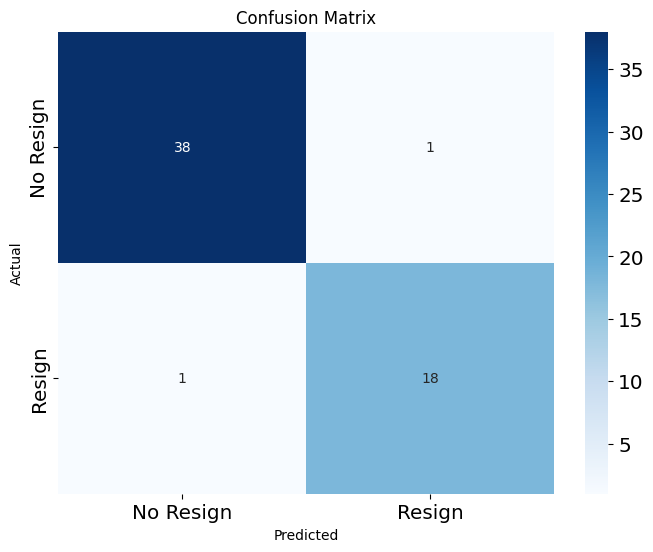

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Resign', 'Resign'], yticklabels=['No Resign', 'Resign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Checking the cross validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Create your Gradient Boosting model
model = GradientBoostingClassifier()

# Specify the evaluation metrics you want to use
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform 10-fold cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

# Calculate the mean and standard deviation of precision, recall, and ROC-AUC scores
precision_mean = cv_results['test_precision'].mean()
precision_std = cv_results['test_precision'].std()
recall_mean = cv_results['test_recall'].mean()
recall_std = cv_results['test_recall'].std()
roc_auc_mean = cv_results['test_roc_auc'].mean()
roc_auc_std = cv_results['test_roc_auc'].std()

# Print the results
print(f'Mean Precision: {precision_mean:.2f} (±{precision_std:.2f})')
print(f'Mean Recall: {recall_mean:.2f} (±{recall_std:.2f})')
print(f'Mean ROC-AUC: {roc_auc_mean:.2f} (±{roc_auc_std:.2f}')

Mean Precision: 0.97 (±0.05)
Mean Recall: 0.96 (±0.07)
Mean ROC-AUC: 0.97 (±0.03


These results suggest that the model demonstrates strong precision and recall scores, indicating its ability to correctly classify positive cases while minimizing false positives and false negatives. Additionally, the high ROC-AUC score reflects the model's excellent overall discrimination ability.

###Setting the Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Create your Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [3, 6, 9],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Define the scoring method (ROC-AUC)
scoring = 'roc_auc'

# Create the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_

print("Best Hyperparameters:")
print(best_params)
print(f"Best Mean ROC-AUC: {best_roc_auc:.2f}")

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Mean ROC-AUC: 1.00


These results indicate that the model demonstrates exceptional predictive power, with the ROC-AUC score reaching its highest possible value of 1.00. The choice of hyperparameters and the resulting ROC-AUC score underscore the model's strong ability to distinguish between positive and negative cases with perfect discrimination.

In summary, the model, fine-tuned with the identified hyperparameters, excels in its classification performance and is well-suited for tasks requiring high predictive accuracy.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting model with the specified hyperparameters
best_params = {
    'learning_rate': 0.01,
    'max_depth': 4,
    'min_samples_leaf': 5,
    'min_samples_split': 3,
    'n_estimators': 50,
    'subsample': 0.8
}

model = GradientBoostingClassifier(**best_params)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print(f'confusion matrix: \n {conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

confusion matrix: 
 [[39  0]
 [ 1 18]]
Accuracy: 0.98
Precision: 1.00
Recall: 0.95
F1 Score: 0.97
ROC-AUC: 0.99


###Visualize the Plot After Hyperparameter

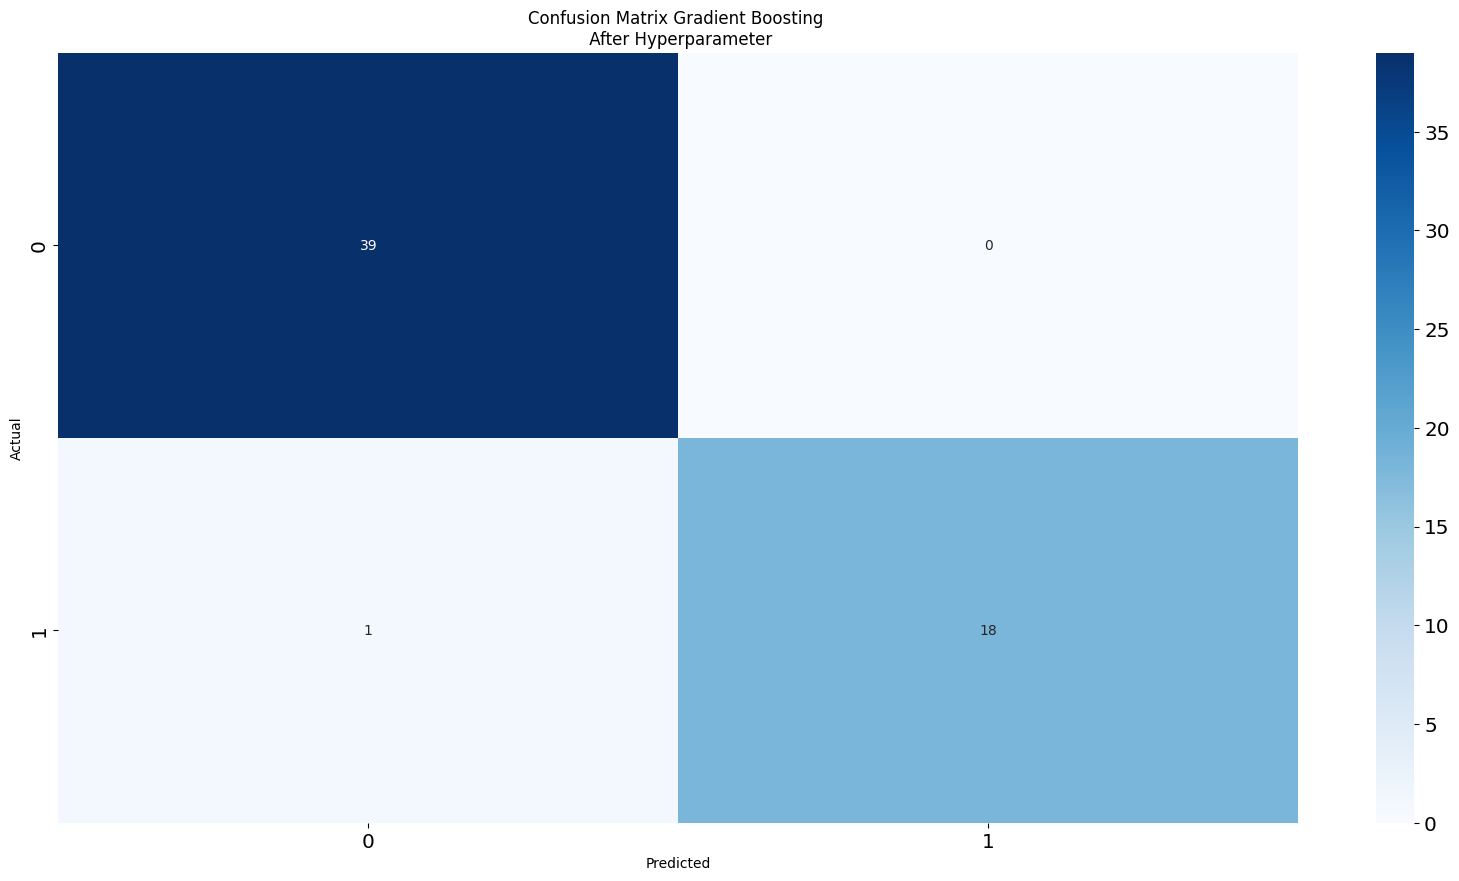

In [ ]:
confusion_matrix = [[39, 0],
                    [1, 18]]

# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Set labels for the x and y axes
plt.title('Confusion Matrix Gradient Boosting \n After Hyperparameter')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

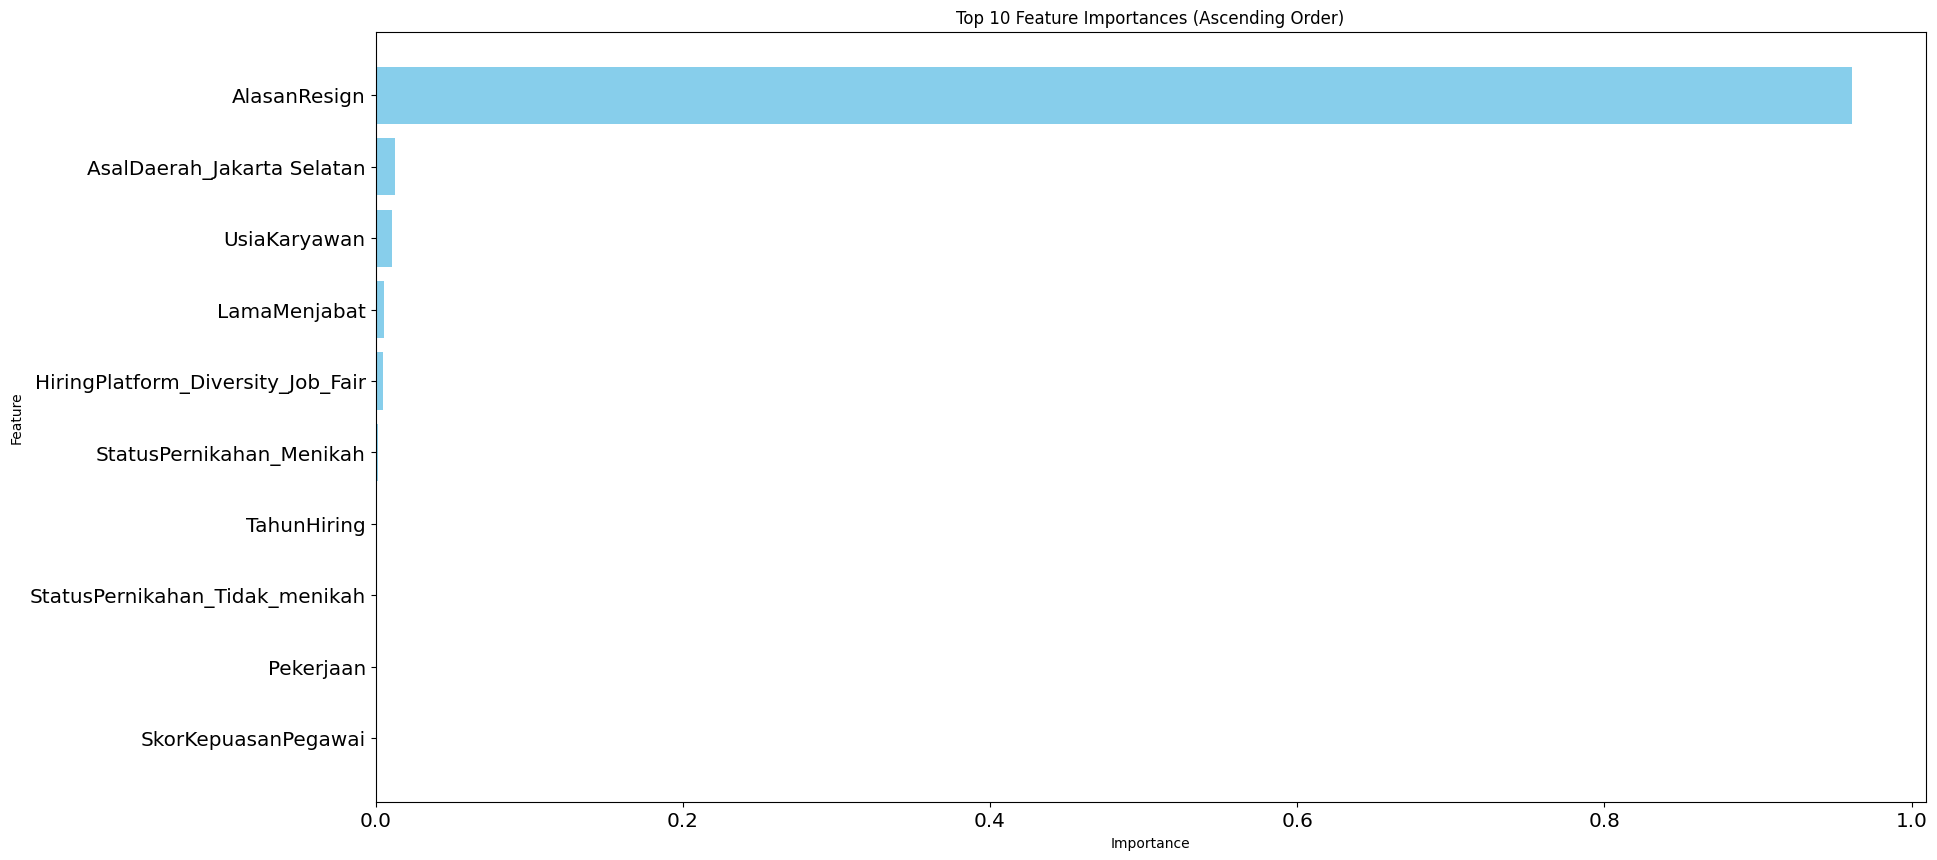

In [ ]:
# Train your GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Importance in ascending order
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot the top 10 feature importances in a bar chart
top_features = sorted_feature_df.tail(10)  # Get the top 10 features
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Ascending Order)')
plt.show()

fromt the plot above it is really explainatory because we reallly trying focus on how we try to improving retention prediction and the most feature importance there is, is actually AlasanResign (Resign Reason) and a worker from Jakarta selatan:

here are some of my assumptions and hypotheses that can be derived:

1. **AlasanResign (Reason for Resignation)**: The high importance of the "AlasanResign" feature suggests that the specific reasons employees provide for their resignation play a crucial role in predicting attrition. Assumptions related to this feature could include:
* Certain reasons, such as career advancement opportunities or dissatisfaction with the work environment, might be more strongly associated with resignations.

* Employees who resign due to personal reasons may exhibit different retention patterns compared to those resigning for professional growth.

2. **AsalKota_Jakarta Selatan (Origin: South Jakarta)**: The significance of the "AsalKota_Jakarta Selatan" feature implies that the geographic location of employees' origins is a noteworthy factor. Assumptions related to this feature may include:
* Employees from South Jakarta may face unique challenges or opportunities in their work environment, leading to different retention behaviors.

* Factors such as commute times or access to job opportunities in South Jakarta could affect employee retention.

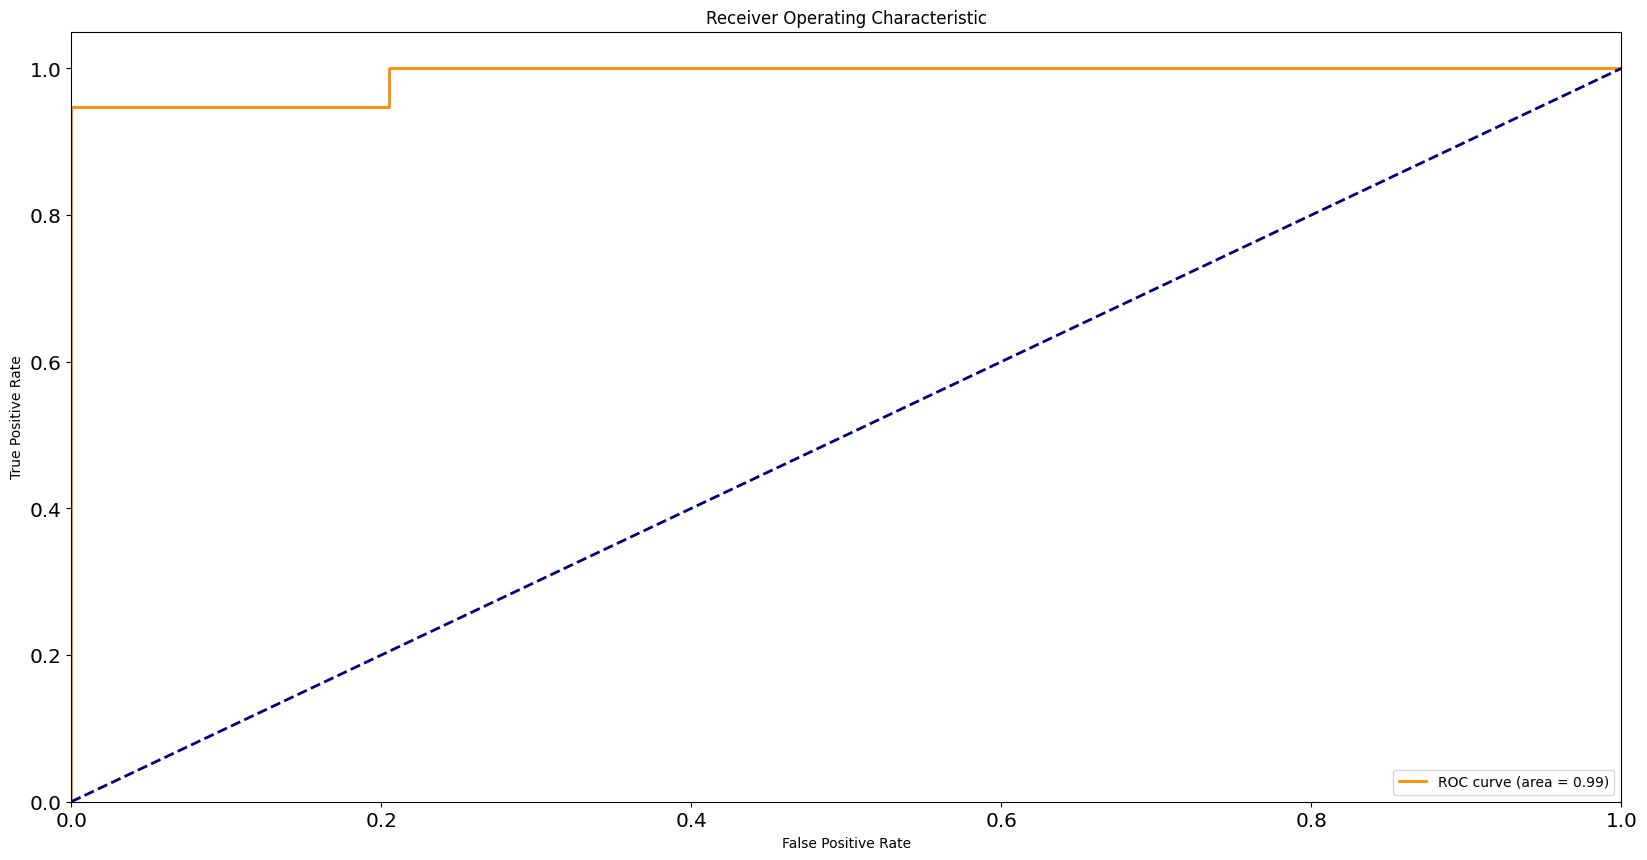

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


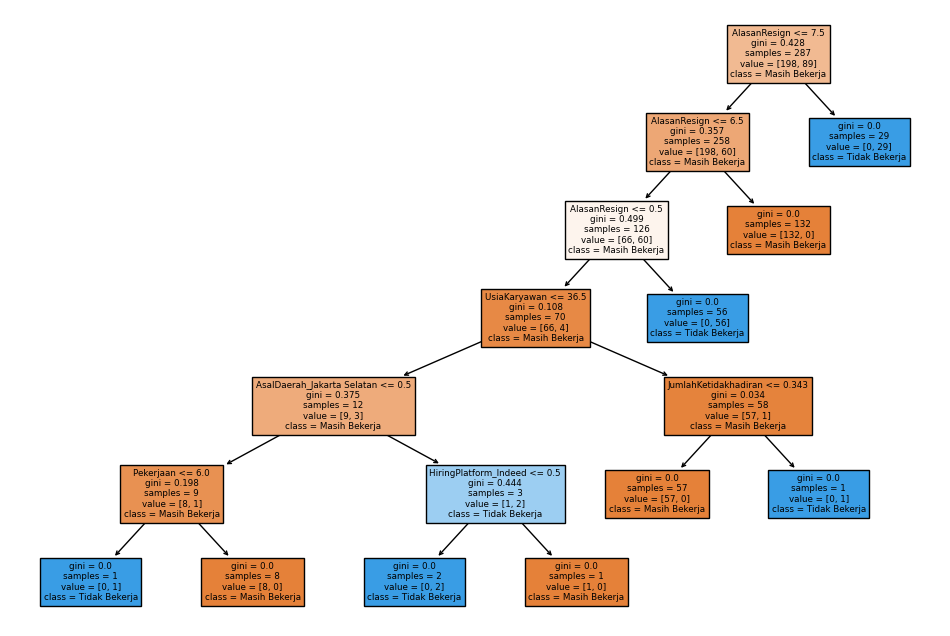

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming df_encoded contains your dataset
X = df_encoded.drop(['StatusKerja'], axis=1)
y = df_encoded['StatusKerja']

# Create and fit a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Masih Bekerja", "Tidak Bekerja"])
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.6 MB/s eta 0:00:00


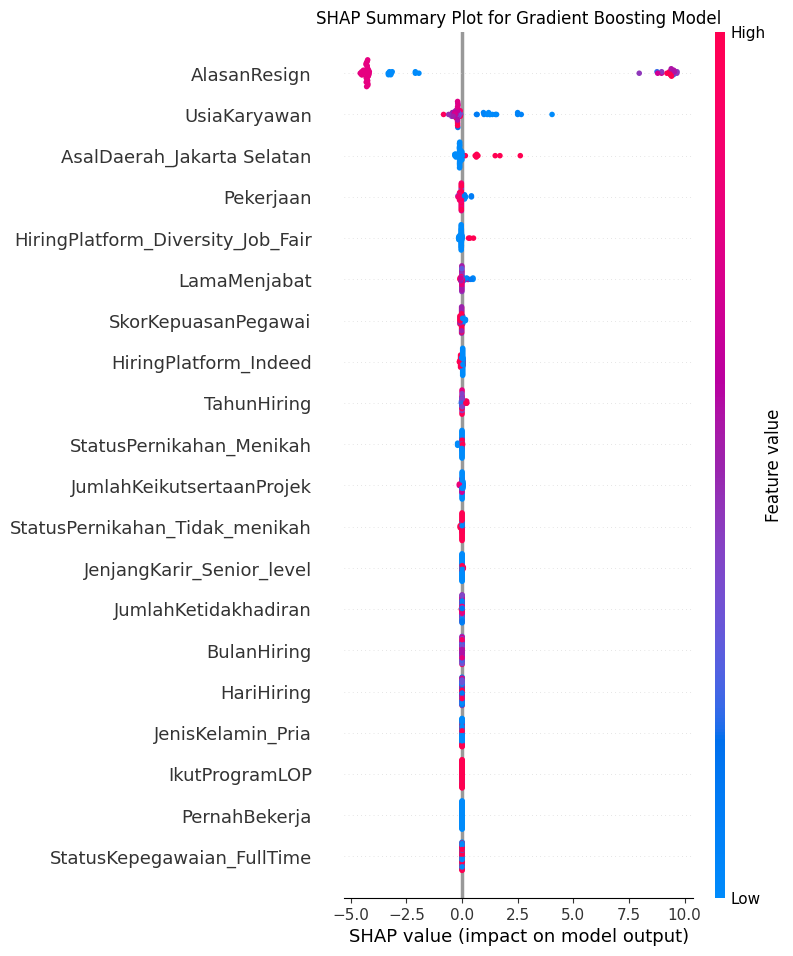

In [ ]:
!pip install shap
import shap

# Train your Gradient Boosting model (replace with your model)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Initialize a SHAP explainer
explainer = shap.Explainer(gb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Summary Plot for Gradient Boosting Model')
plt.show()

Epoch 1/10
4/4 [==============================] - 2s 189ms/step - loss: 89.5773 - accuracy: 0.3057 - val_loss: 44.2579 - val_accuracy: 0.3276
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 25.2565 - accuracy: 0.3057 - val_loss: 5.5567 - val_accuracy: 0.6724
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 9.3032 - accuracy: 0.6943 - val_loss: 15.4493 - val_accuracy: 0.6724
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 14.8901 - accuracy: 0.6943 - val_loss: 15.2468 - val_accuracy: 0.6724
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 12.6159 - accuracy: 0.6943 - val_loss: 9.5491 - val_accuracy: 0.6724
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 6.4876 - accuracy: 0.6943 - val_loss: 0.7612 - val_accuracy: 0.5172
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 3.9752 - accuracy: 0.3886 - val_loss: 4.2252 - val_accuracy: 0.3276
Epoch 8/10
4/4 [===

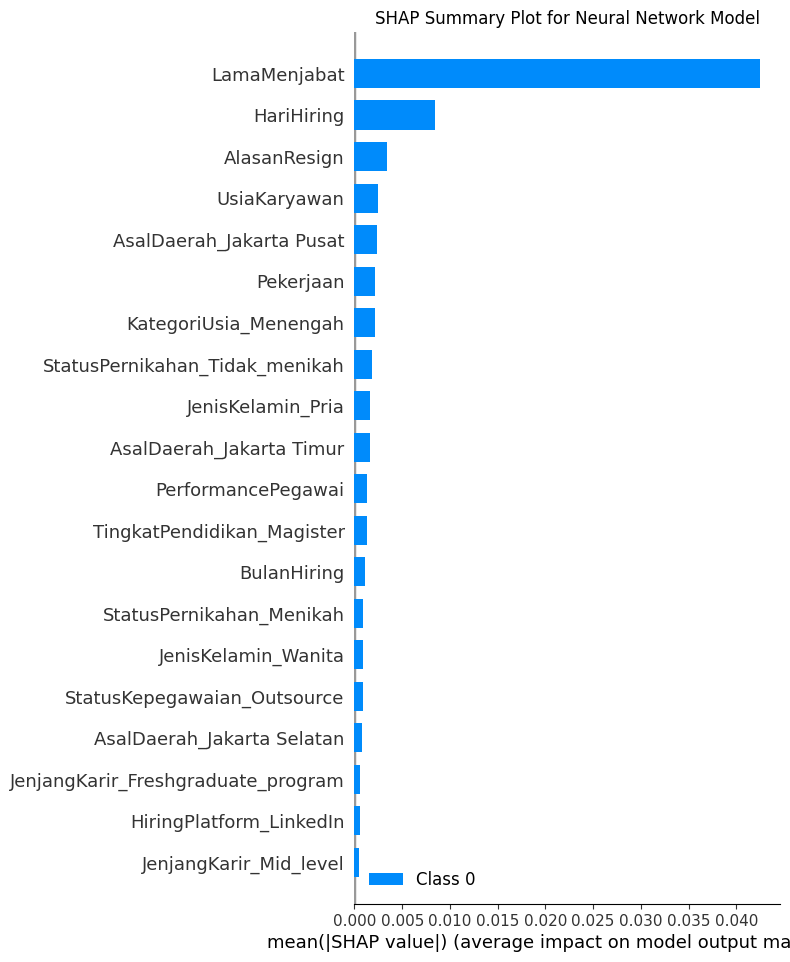

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shap


# Create and compile your neural network model (replace with your model)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train your neural network model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Convert X_test from DataFrame to a NumPy array
X_test_array = X_test.values

# Get the column names from X_test
feature_names = X_test.columns

# Initialize an Integrated Gradients explainer
explainer = shap.GradientExplainer(model, X_train)

# Calculate SHAP values
shap_values, indexes = explainer.shap_values(X_test_array, ranked_outputs=1)

# Summary plot (global feature importance) with feature names
shap.summary_plot(shap_values, X_test_array, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot for Neural Network Model')
plt.show()